# Laboratorio 1: Clasificación



## Instrucciones

- Haz una copia de este notebook en `File -> Save a copy in Drive`.
- Al final de la sesión, descarga el notebook `File -> Download -> Download .ipynb` y súbelo en la sección Tareas de U-Cursos que se abrirá para esta sesión.


## Preguntas teóricas

### Pregunta 1

1. Un consultor en datos tiene la siguiente estrategia al momento de enfrentar un problema de clasificación: probar todos los modelos posibles hasta encontrar el que tenga mayor accuracy. Comente la estrategia del consultor, exponga los posibles problemas de esta evaluación y proponga una estrategia alternativa para evaluar el desempeño de los modelos.

**Respuesta:**

La estrategia del consultor no es necesariamente adecuada, pues **accuracy** no es la única métrica que existe para evaluar el desempeño de un modelo. En particular, podría ser problemático si la clase está desbalanceada.


Una estrategia alternativa consistiría en determinar qué es lo más importante que debe predecir el modelo, y cuáles son los costos de los errores que se pudieran cometer, y en base a ello escoger otra métrica para evaluar el desempeño.

Por ejemplo, **precision** es una buena medida cuando el costo de los falsos positivos es alta, mientras que **recall** es una buena medida cuando el costo de los falsos negativos es alta.


### Pregunta 2

Verdadero o Falso (si la afirmación es falsa justifique):

1. Si se quieren predecir las clases en un dataset que está desbalanceado es SIEMPRE útil aplicar técnicas de subsampling u oversampling sobre todo el conjunto de datos.

**Respuesta:**

Falso. No siempre es útil aplicar esas técnicas, lo ideal es comparar los distintos métodos utilizados. Además, las ténicas de subsampling y oversampling sólo se deben aplicar sobre el conjunto de datos de entrenamiento, no sobre los de evaluación.



2. La clasificación es un método de aprendizaje supervisado que se caracteriza por no necesitar datos etiquetados.

**Respuesta:**

Falso. Si bien es un método de aprendizaje supervisado, sí necesita tener datos etiquetados.


## Preguntas prácticas

Usaremos un dataset de enfermedades cardíacas el cual describe, a través de la clase `target`, si está o no presente este tipo de complicaciones. Cada fila a su vez esta definida por una serie de atributos que podrían estar relacionado a la ocurrencia de la clase. En mayor detalle puede acceder al link de Kaggle tal como se presenta a continuación:

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

El dataset que usaremos está en u-cursos y debe ser cargado con las siguientes líneas de código.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))


In [3]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


## Pregunta 1

Muestre cuál es el número de instancias de cada clase en el dataset. Utilice el método que desee en Python.

In [4]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

La clase "target" tiene dos valores posibles, el 1 que tiene 526 instancias y  el 0 que tiene 499 instancias.

## Pregunta 2

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** de *sklearn* y utilice las variables `X_train, X_test, y_train, y_test`.

Escriba el código necesario para dividir los datos, entrenar el modelo utilizando `Decision Tree` e indicar el **accuracy**, **precision** y **recall** del clasificador.
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente

**NOTA: al dividir el dataset use el parámetro `stratify=y`.**


In [18]:
#Se importan las funciones de las librerías a utilizar
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Se extraen los atributos (X) y la clase (y) desde el dataset (df)
X = np.array(df.iloc[:,:-1])
y = df.iloc[: , -1]

#Se dividen los datos en training y testing, en este caso un 70% y 30%, respectivamente, (test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=36, stratify=y)

#Se escoge el clasificador a utilizar, en este caso se utiliza el modelo Decision Tree
clf = DecisionTreeClassifier()
#Se fitea el modelo con los datos de training (entrenamiento)
clf.fit(X_train, y_train)
#Se obtiene las predicciones a partir de los atributos de testeo (prueba)
y_pred = clf.predict(X_test)

#Se pueden obtener distintas métricas comparando los valores predichos (y_pred) con los reales (y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9772727272727273
Precision: 0.9748427672955975
Recall: 0.9810126582278481


## Pregunta 3

Genere la matriz de confusión de los resultados obtenidos anteriormente. Describa 2 observaciones de los valores donde el clasificador acierta y falla.

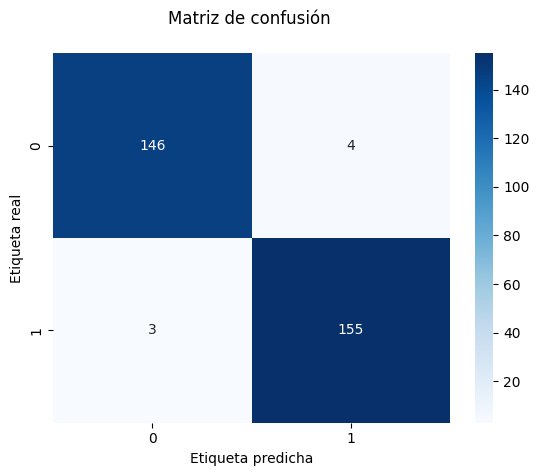

In [21]:
#Se importan las funciones y librerías a utilizar
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns;
import matplotlib.pyplot as plt

#Se crea la confusion matrix a partir de los valores predichos y los reales, esta matriz identifica los
#False positivos y negativos, y los
#True positivos y negativos
cm = confusion_matrix(y_test, y_pred)
classes = unique_labels(y_test, y_pred)

#Se pasa la matriz a formato dataframe
matrix = pd.DataFrame(cm, index = classes, columns = classes)

#Usando seaborn se crea un mapa de calor (heatmap) a partir de la matriz
g = sns.heatmap(matrix, annot=True, cmap="Blues",fmt='d')

#Se asigna un título y nombres a los ejes
plt.title('Matriz de confusión \n')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.autoscale()

- El clasificador falla en 7 casos (3 falsos negativos y 4 falsos positivos).
- La matriz de confusión muestra que hay 3 falsos negativos donde la persona sí presenta la enfermedad, pero ha sido predicho que no, y 4 falsos positivos donde la persona no presenta la enfermedad y ha sido predicho que sí.
- El clasificador acierta en 301 casos (146 negativos y 155 positivos).

## Pregunta 4

Dada la naturaleza del dataset utilizado ¿Qué valores serían más críticos de poder reducir entre Falsos Positivos y Falsos Negativos? Comente al respecto.

- En este dataset los valores de la clase "target" representan: 1 que hay enfermedad, y 0 que no hay enfermedad.
- Debería ser crítico intentar reducir los falsos negativos, pues es "más grave" decirle a una persona que no posee la enfermedad siendo que sí la posee, versus decirle a una persona que sí posee la enfermedad siendo que no la posee. Pues en el primer caso no se le daría el tratamiento necesario al paciente.

## Pregunta 5

Aplique k-fold cross validation para evaluar el clasificador. Pruebe con valores de `k` entre 2 y 4. Reporte los valores promedios obtenidos sobre el conjunto de prueba de las métricas de f1-score, precision y recall para cada `k`. También incluya el valor de la desviación estándar.

¿Cambian los valores al modificar `k`? De ser así, ¿por qué cree que esto ocurre?

- Dado que los datos están bastante balanceados (526, 499) no es necesario usar técnicas de oversampling and undersampling.

In [24]:
from sklearn.model_selection import cross_validate
#Las métricas que se piden son f1-score, precision y recall
scoring = ['f1', 'precision', 'recall']
#Usamos un while para evaluar el clasificador para k=(2,3,4)

k=2
while k<5:
  cv_results = cross_validate(clf, X, y, cv = k, scoring = scoring, return_train_score= True)
  print("Resultados para: k="+ str(k))
  print("Precision")
  print('Promedio:', np.mean(cv_results['test_precision']))
  print('Desviación estándar:', np.std(cv_results['test_precision']))
  print("Recall")
  print('Promedio:', np.mean(cv_results['test_recall']))
  print('Desviación estándar:', np.std(cv_results['test_recall']))
  print("f1 score")
  print('Promedio:', np.mean(cv_results['test_f1']))
  print('Desviación estándar:', np.std(cv_results['test_f1']))
  print("")
  k=k+1

Resultados para: k=2
Precision
Promedio: 0.9603325827126278
Desviación estándar: 0.0038108435821929687
Recall
Promedio: 0.9201520912547528
Desviación estándar: 0.0
f1 score
Promedio: 0.9398093686845836
Desviación estándar: 0.0018248725605525817

Resultados para: k=3
Precision
Promedio: 0.9625100262858949
Desviación estándar: 0.0030707813812338603
Recall
Promedio: 0.9772077922077922
Desviación estándar: 0.016116720909216474
f1 score
Promedio: 0.9697606116370904
Desviación estándar: 0.009465334231553596

Resultados para: k=4
Precision
Promedio: 1.0
Desviación estándar: 0.0
Recall
Promedio: 0.9866990515845477
Desviación estándar: 0.01355597371049997
f1 score
Promedio: 0.9932580932580932
Desviación estándar: 0.006874578565236806



- Los valores obtenidos del promedio y desviación estándar, para las distintas métricas, cambian al modificar el k.
- Esto se debe a que los porcentajes de training y testing cambian para cada valor de k.
    - Para k=2 se tiene un 50% y 50%, respectivamente.
    - Para k=3 se tiene un 66.6% y 33.3%, respectivamente.
    - Para k=4 se tiene un 75% y 25%, respectivamente.
